<a href="https://colab.research.google.com/github/clustering-jun/GNU-MachineLearning/blob/main/L10-2_%EC%BB%A4%EB%84%90_%ED%8A%B8%EB%A6%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **`(10-1) 연습문제` 라그랑주 승수법과 KKT 조건을 적용하여 주어진 2개의 학습 데이터 (X1, X2)에 대한 새로운 데이터 포인트(X3)의 클래스를 예측하시오.**
 - X1 = [4 ; 7],
 - X2 = [1 ; 2],
 - X3 = [3 ; 2],
 - y1 = 1
 - y2 = -1
 - ***y3 = ?***

## **서포트 벡터 머신 분류 모델 훈련하기**

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

iris = datasets.load_iris()
features = iris.data
target = iris.target

scaler = StandardScaler()
feature_standardized = scaler.fit_transform(features)

model1 = SVC()
model1.fit(feature_standardized, target)

new_obs = [[0.4, 0.4, 0.4, 0.4]]
print(model1.predict(new_obs))

[1]


In [ ]:
# 비선형 데이터 생성
import numpy as np
from sklearn.svm import SVC

np.random.seed(0)

features = np.random.randn(200, 2)

target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

svc_linear = SVC(kernel='linear', random_state=0, C = 1)
svc_linear.fit(features, target)

svc_rbf = SVC(kernel='rbf', random_state=0, gamma = 1, C = 1)
svc_rbf.fit(features, target)

SVC(C=1, gamma=1, random_state=0)

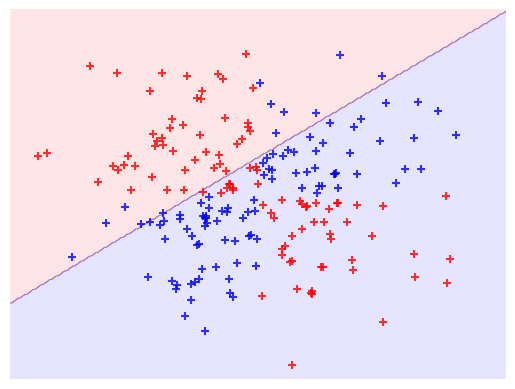

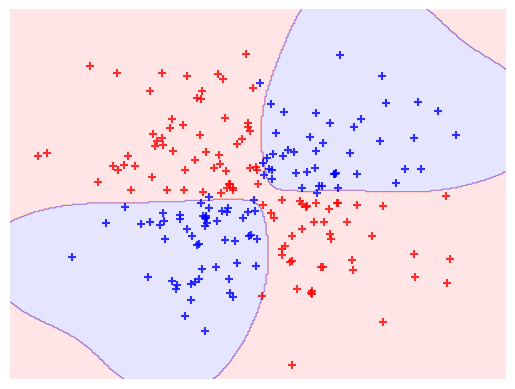

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02),
                           np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(),
                                     xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap.colors[idx],
                    marker="+", label=cl)

plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off")
plt.show()

plot_decision_regions(features, target, classifier=svc_rbf)
plt.axis("off")
plt.show()


In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

iris = datasets.load_iris()
features = iris.data
target = iris.target

scaler = StandardScaler()
feature_standardized = scaler.fit_transform(features)

model1 = SVC(kernel='linear', probability=True, random_state=0)
model1.fit(feature_standardized, target)

print(model1.predict(new_obs))
print(model1.predict_proba(new_obs))

[1]
[[0.00541761 0.97348825 0.02109414]]


In [ ]:
# 서포터 벡터 식별

model1.support_vectors_

array([[-0.90068117,  0.55861082, -1.16971425, -0.92054774],
       [-1.62768839, -1.74335684, -1.39706395, -1.18381211],
       [ 1.2803405 ,  0.09821729,  0.64908342,  0.3957741 ],
       [ 0.79566902, -0.59237301,  0.47857113,  0.3957741 ],
       [ 0.55333328,  0.55861082,  0.53540856,  0.52740629],
       [-1.14301691, -1.51316008, -0.26031542, -0.26238682],
       [-0.29484182, -0.13197948,  0.42173371,  0.3957741 ],
       [ 0.4321654 , -1.97355361,  0.42173371,  0.3957741 ],
       [ 0.06866179,  0.32841405,  0.59224599,  0.79067065],
       [ 0.55333328, -1.28296331,  0.64908342,  0.3957741 ],
       [ 1.15917263, -0.59237301,  0.59224599,  0.26414192],
       [ 1.03800476, -0.13197948,  0.70592084,  0.65903847],
       [ 0.18982966, -0.36217625,  0.42173371,  0.3957741 ],
       [ 0.18982966, -0.82256978,  0.76275827,  0.52740629],
       [-0.53717756, -0.13197948,  0.42173371,  0.3957741 ],
       [ 0.55333328, -1.74335684,  0.36489628,  0.13250973],
       [-0.90068117, -1.

In [ ]:
model1.n_support_

array([ 2, 15, 12], dtype=int32)

## **`연습 문제` 아래의 코드를 참고하여 Survived에 대해 예측하는 SVM 분류 모델을 적절하게 학습시킨 후, 다음 입력값에 대한 예측값과 예측 확률, 그리고 서포트 벡터의 정보를 출력하시오.**

- obs = [[1, 0, 28, 62]]

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

titanic = pd.read_csv('titanic.csv')
titanic = titanic.dropna()

features = titanic[['Pclass', 'Sex', 'Age', 'Fare']]
target = titanic['Survived']

Sex_mapping = {'male': 0, 'female': 1}
features['Sex'] = features['Sex'].replace(Sex_mapping)

scaler = StandardScaler()
feature_standardized = scaler.fit_transform(features)

model1 = SVC()
model1.fit(feature_standardized, target)

obs = [[1, 0, 28, 62]]
print('==== 예측 결과 ====')
print(model1.predict(obs))
print('==============\n')

==== 예측 결과 ====
[1]



/tmp/ipython-input-2002253684.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features['Sex'] = features['Sex'].replace(Sex_mapping)
/tmp/ipython-input-2002253684.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Sex'] = features['Sex'].replace(Sex_mapping)


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ---------------------------------
# 1. 데이터 로드 및 전처리
# ---------------------------------
titanic = pd.read_csv('titanic.csv')
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
titanic = titanic.dropna()

X = titanic[['Pclass', 'Sex', 'Age', 'Fare']]
y = titanic['Survived']

# Sex 이진 매핑
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# ---------------------------------
# 2. 전처리 파이프라인
# ---------------------------------
numeric_features = ['Pclass', 'Age', 'Fare']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'  # Sex는 스케일링하지 않음
)

# ---------------------------------
# 3. SVM 파이프라인 (확률 예측 활성화)
# ---------------------------------
svm_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('svm', SVC(kernel='rbf', C=1.0, probability=True))
    ]
)

# ---------------------------------
# 4. 학습 / 테스트 분리 및 학습
# ---------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

svm_pipeline.fit(X_train, y_train)

# ---------------------------------
# 5. 입력값에 대한 예측
# ---------------------------------
# 예시 입력값 (Pclass, Sex, Age, Fare)
input_data = pd.DataFrame(
    [[3, 0, 25, 7.25]],
    columns=['Pclass', 'Sex', 'Age', 'Fare']
)

pred_class = svm_pipeline.predict(input_data)
pred_prob = svm_pipeline.predict_proba(input_data)

print("입력값:")
print(input_data)

print("\n예측 클래스 (0: 사망, 1: 생존):")
print(pred_class[0])

print("\n예측 확률 [사망, 생존]:")
print(pred_prob[0])

# ---------------------------------
# 6. 서포트 벡터 정보 출력
# ---------------------------------
svm_model = svm_pipeline.named_steps['svm']

print("\n서포트 벡터 개수 (클래스별):")
print(svm_model.n_support_)

print("\n서포트 벡터 인덱스 (훈련 데이터 기준):")
print(svm_model.support_)

print("\n서포트 벡터 좌표 (스케일링된 feature 공간):")
print(svm_model.support_vectors_)


입력값:
   Pclass  Sex  Age  Fare
0       3    0   25  7.25

예측 클래스 (0: 사망, 1: 생존):
0

예측 확률 [사망, 생존]:
[0.85367077 0.14632923]

서포트 벡터 개수 (클래스별):
[133 134]

서포트 벡터 인덱스 (훈련 데이터 기준):
[  5   7   9  11  29  35  38  46  48  52  53  57  64  68  70  74  85  98
  99 100 103 104 109 110 113 116 119 122 125 129 137 141 142 153 158 159
 162 165 170 174 179 182 186 194 195 196 207 209 212 214 219 226 227 230
 237 239 241 246 247 251 254 255 260 263 268 269 276 279 283 290 294 298
 300 303 305 309 314 315 316 317 337 341 344 354 355 361 365 366 375 379
 380 383 386 390 392 398 403 413 422 424 425 428 432 433 436 439 441 442
 444 447 455 458 461 462 464 465 469 473 479 480 496 504 506 509 511 513
 515 516 520 539 541 551 566   0   8  10  13  16  21  24  37  39  40  44
  47  49  50  51  58  59  60  63  76  77  89  91  92  93  97 105 107 115
 117 118 126 127 131 132 133 138 139 143 151 154 157 176 183 190 191 197
 199 202 203 215 216 220 222 223 225 228 231 232 233 234 236 238 240 252
 261 262 272 278 29

/tmp/ipython-input-1945947139.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
